In [1]:
import os
import re
import sys
import glob
import shutil
import numpy as np
import pandas as pd
from scipy import sparse, io
import matplotlib
import matplotlib.pyplot as plt
import anndata as ad
import scanpy as sc

In [2]:
matplotlib.rcParams.update({'font.size': 12})
# %config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
# https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/scanpy/scanpy_01_qc.html
# https://eleozzr.github.io/desc/tutorial.html

In [46]:
# cmd params
arg_keys = {
    'work_dir': "--work_dir=",
}
args = dict()
for argv in sys.argv[1:]:
    for k, arg_key in arg_keys.items():
        if argv.find(arg_key) == 0:
            args[k] = argv[len(arg_key):]

In [3]:
# ### /** Windows operation system **/
# work_dir = 'D:/Document/Programming/Python/deepbio/symphony/github/scanalysis/scqqapy/data/h5/sarcoma/'
# args = dict()
# args['work_dir'] = work_dir
# args['data_work_dir'] = work_dir
# args['fig_work_dir'] = work_dir

# ### /** Linux operation system **/
args['data_work_dir'] = args['work_dir'] + 'scanpy_integ_7_annot.dir/'
args['fig_work_dir'] = args['work_dir'] + 'scanpy_integ_7_annot_fig.dir/'

In [4]:
# read
adata = sc.read_h5ad(args['work_dir'] + 'scanpy_integ_6_clustering.dir/adata_clustering.h5ad')
print(adata.obs['sample'].value_counts())

119289-CCS-08-snRNAseq_S2    6717
119290-CCS-15-snRNAseq_S3    2029
119291-CCS-72-snRNAseq_S4    2021
119288-CCS-07-snRNAseq_S1    1251
Name: sample, dtype: int64


## Annotation

In [5]:
def console(adata):
    print('remaining cells: {}, remaining genes: {}'.format(adata.X.shape[0], adata.X.shape[1]))
    
def saveTo(old_fn='scatter', new_fn='stat_basic', kind='.pdf'):
    os.replace(os.path.join(os.getcwd(), 'figures/' + old_fn + kind), os.path.join(os.getcwd(), 'figures/' + new_fn + kind))
    shutil.move(os.path.join(os.getcwd(), 'figures/' + new_fn + kind), args['fig_work_dir'] + new_fn + kind)
    shutil.rmtree(os.path.join(os.getcwd(), 'figures'))

In [6]:
adata_cp = adata.copy()
adata_cp

AnnData object with n_obs × n_vars = 12018 × 34540
    obs: 'type', 'sample', 'batch', 'n_counts', 'pct_ribo', 'pct_hb', 'pct_mito', 'pct_chrY', 'cnt_XIST', 'n_genes', 'S_score', 'G2M_score', 'phase', 'doublet_scores', 'predicted_doublets', 'doublet_info', 'desc_0.8', 'max.prob0.8', 'louvain'
    var: 'gene_name', 'n_cells'
    uns: 'batch_colors', 'desc_0.8_colors', 'doublet_info_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'prob_matrix0.8', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_Embeded_z0.8', 'X_pca', 'X_pca_harmony', 'X_tsne', 'X_tsne0.8', 'X_umap', 'X_umap0.8'

In [7]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test', corr_method="bonferroni")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


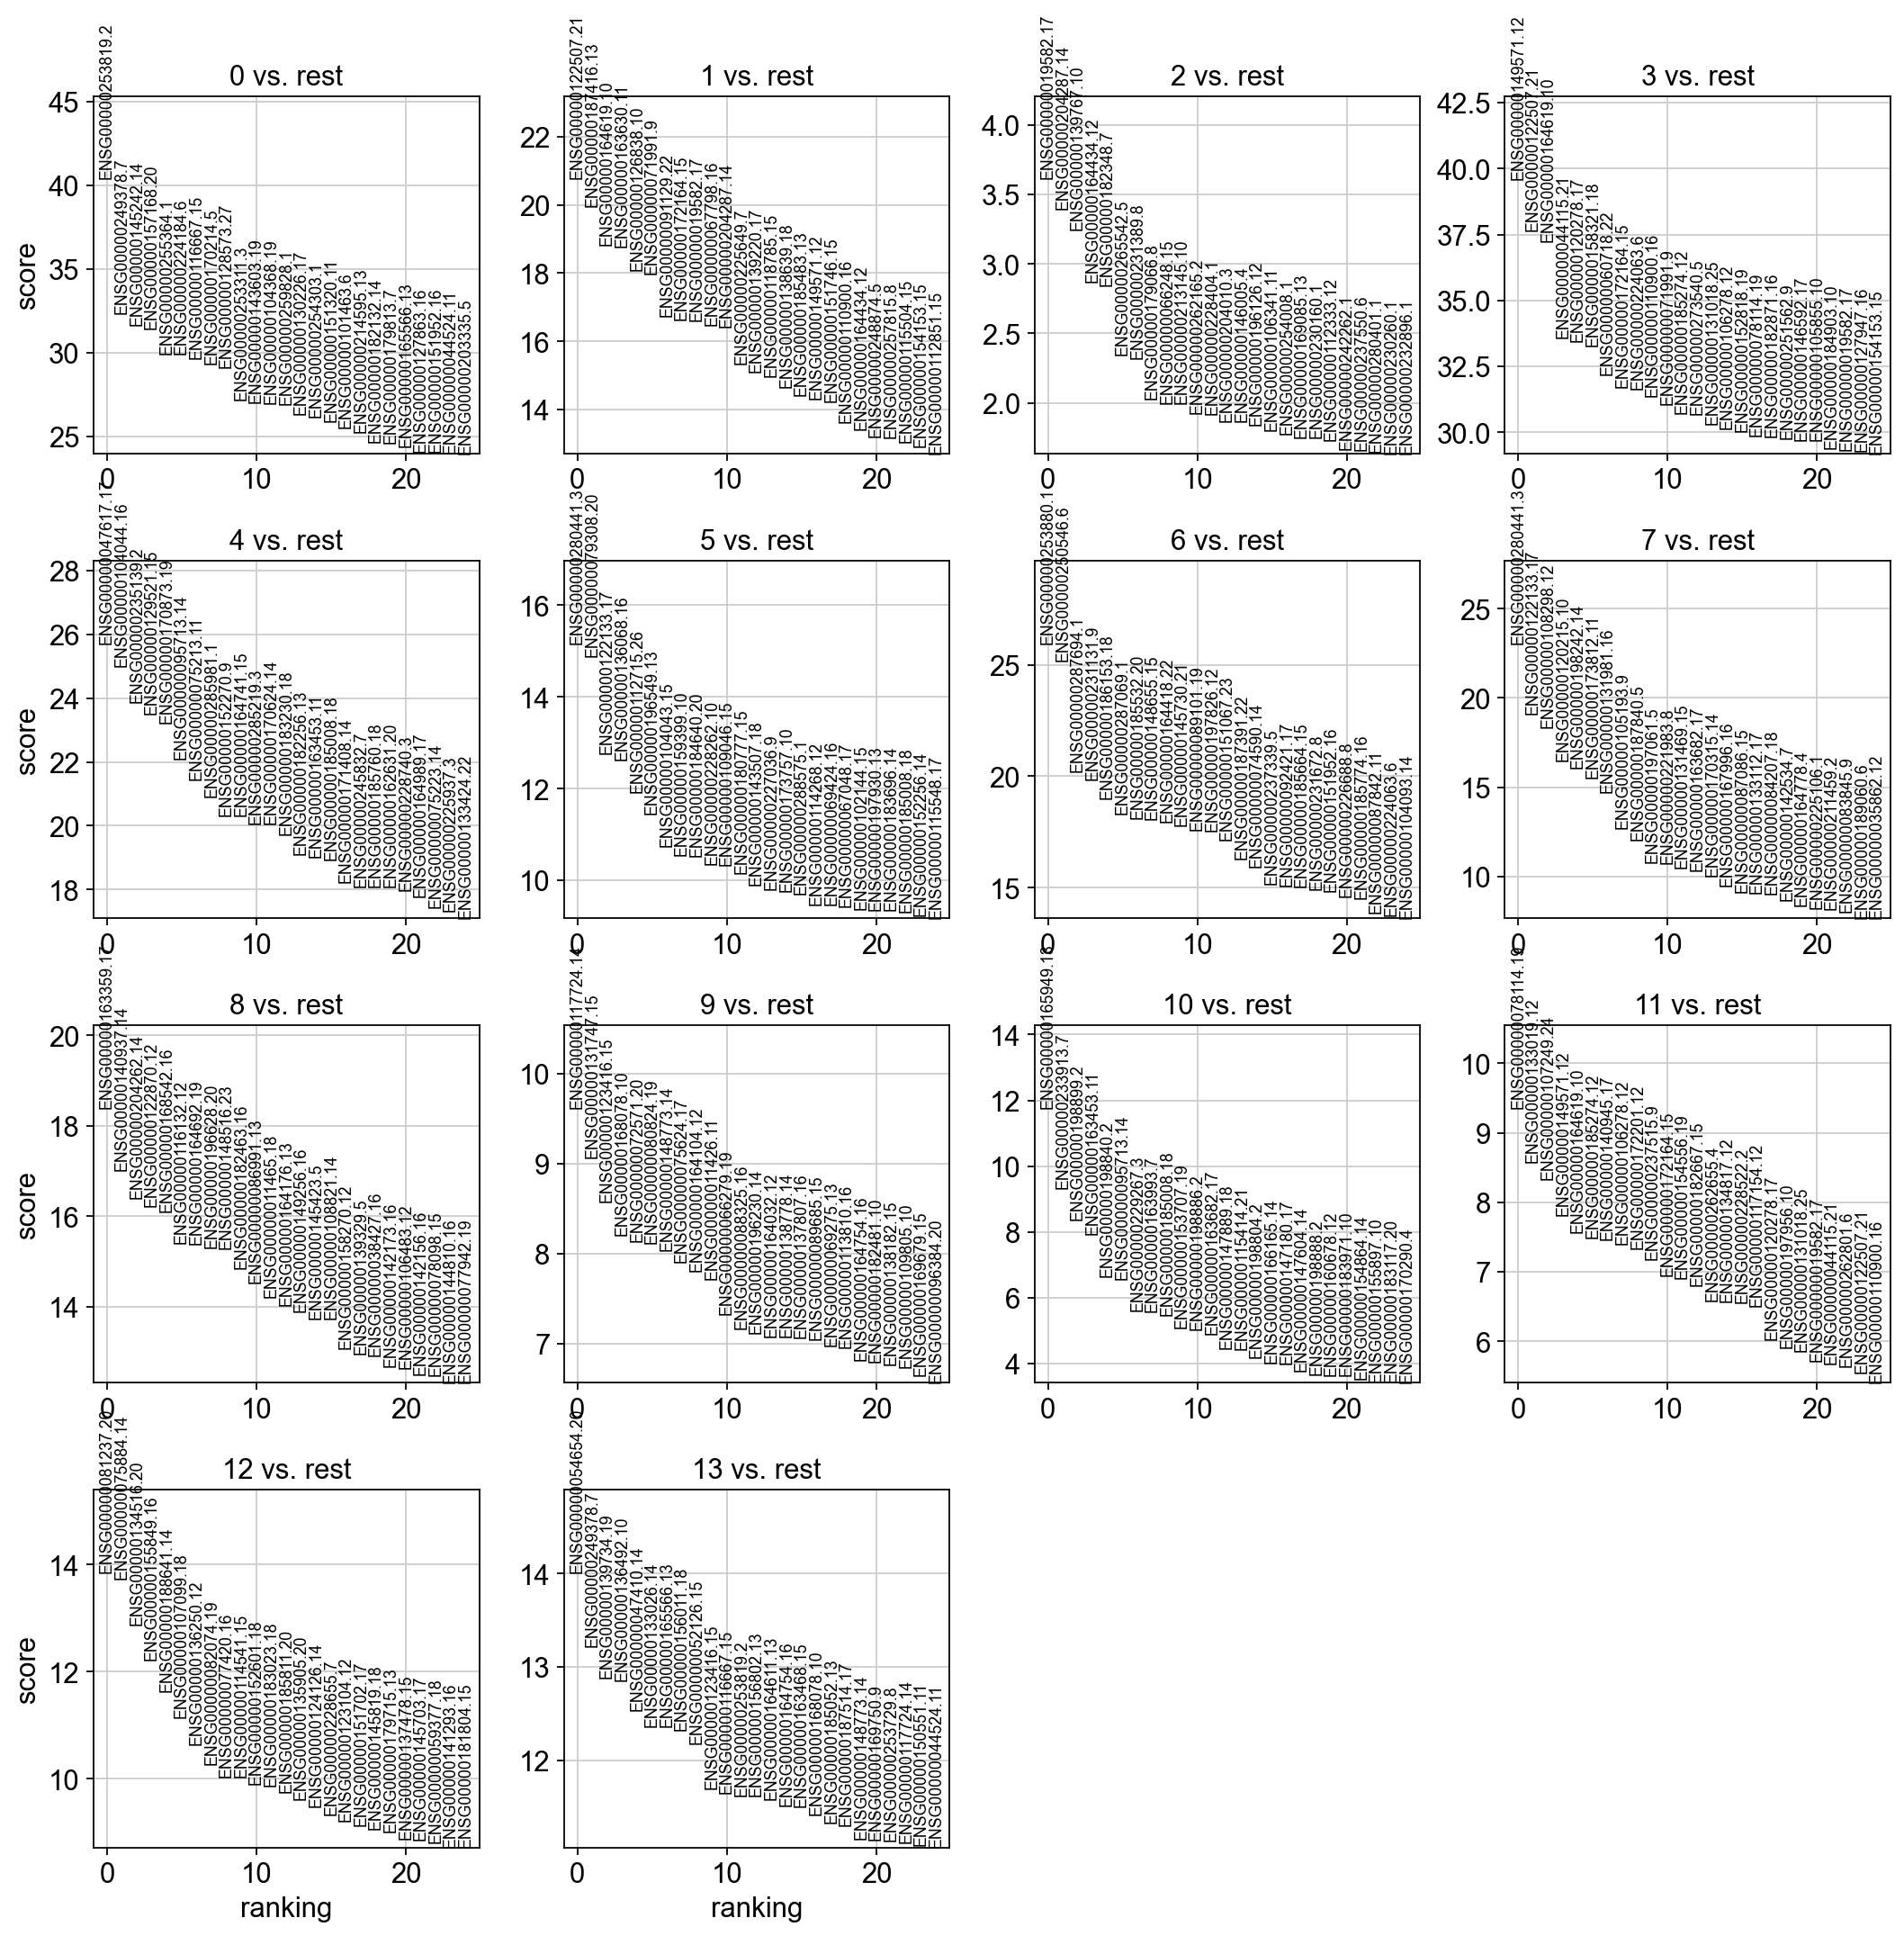

In [10]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save='.pdf')
saveTo(old_fn='rank_genes_groups_louvain', new_fn='rank_gene_louvain_ttest', kind='.pdf')

In [13]:
sc.tl.rank_genes_groups(adata, 'louvain', method='logreg', corr_method="bonferroni")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:48)


D:\Programming\anaconda3\envs\scanal\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


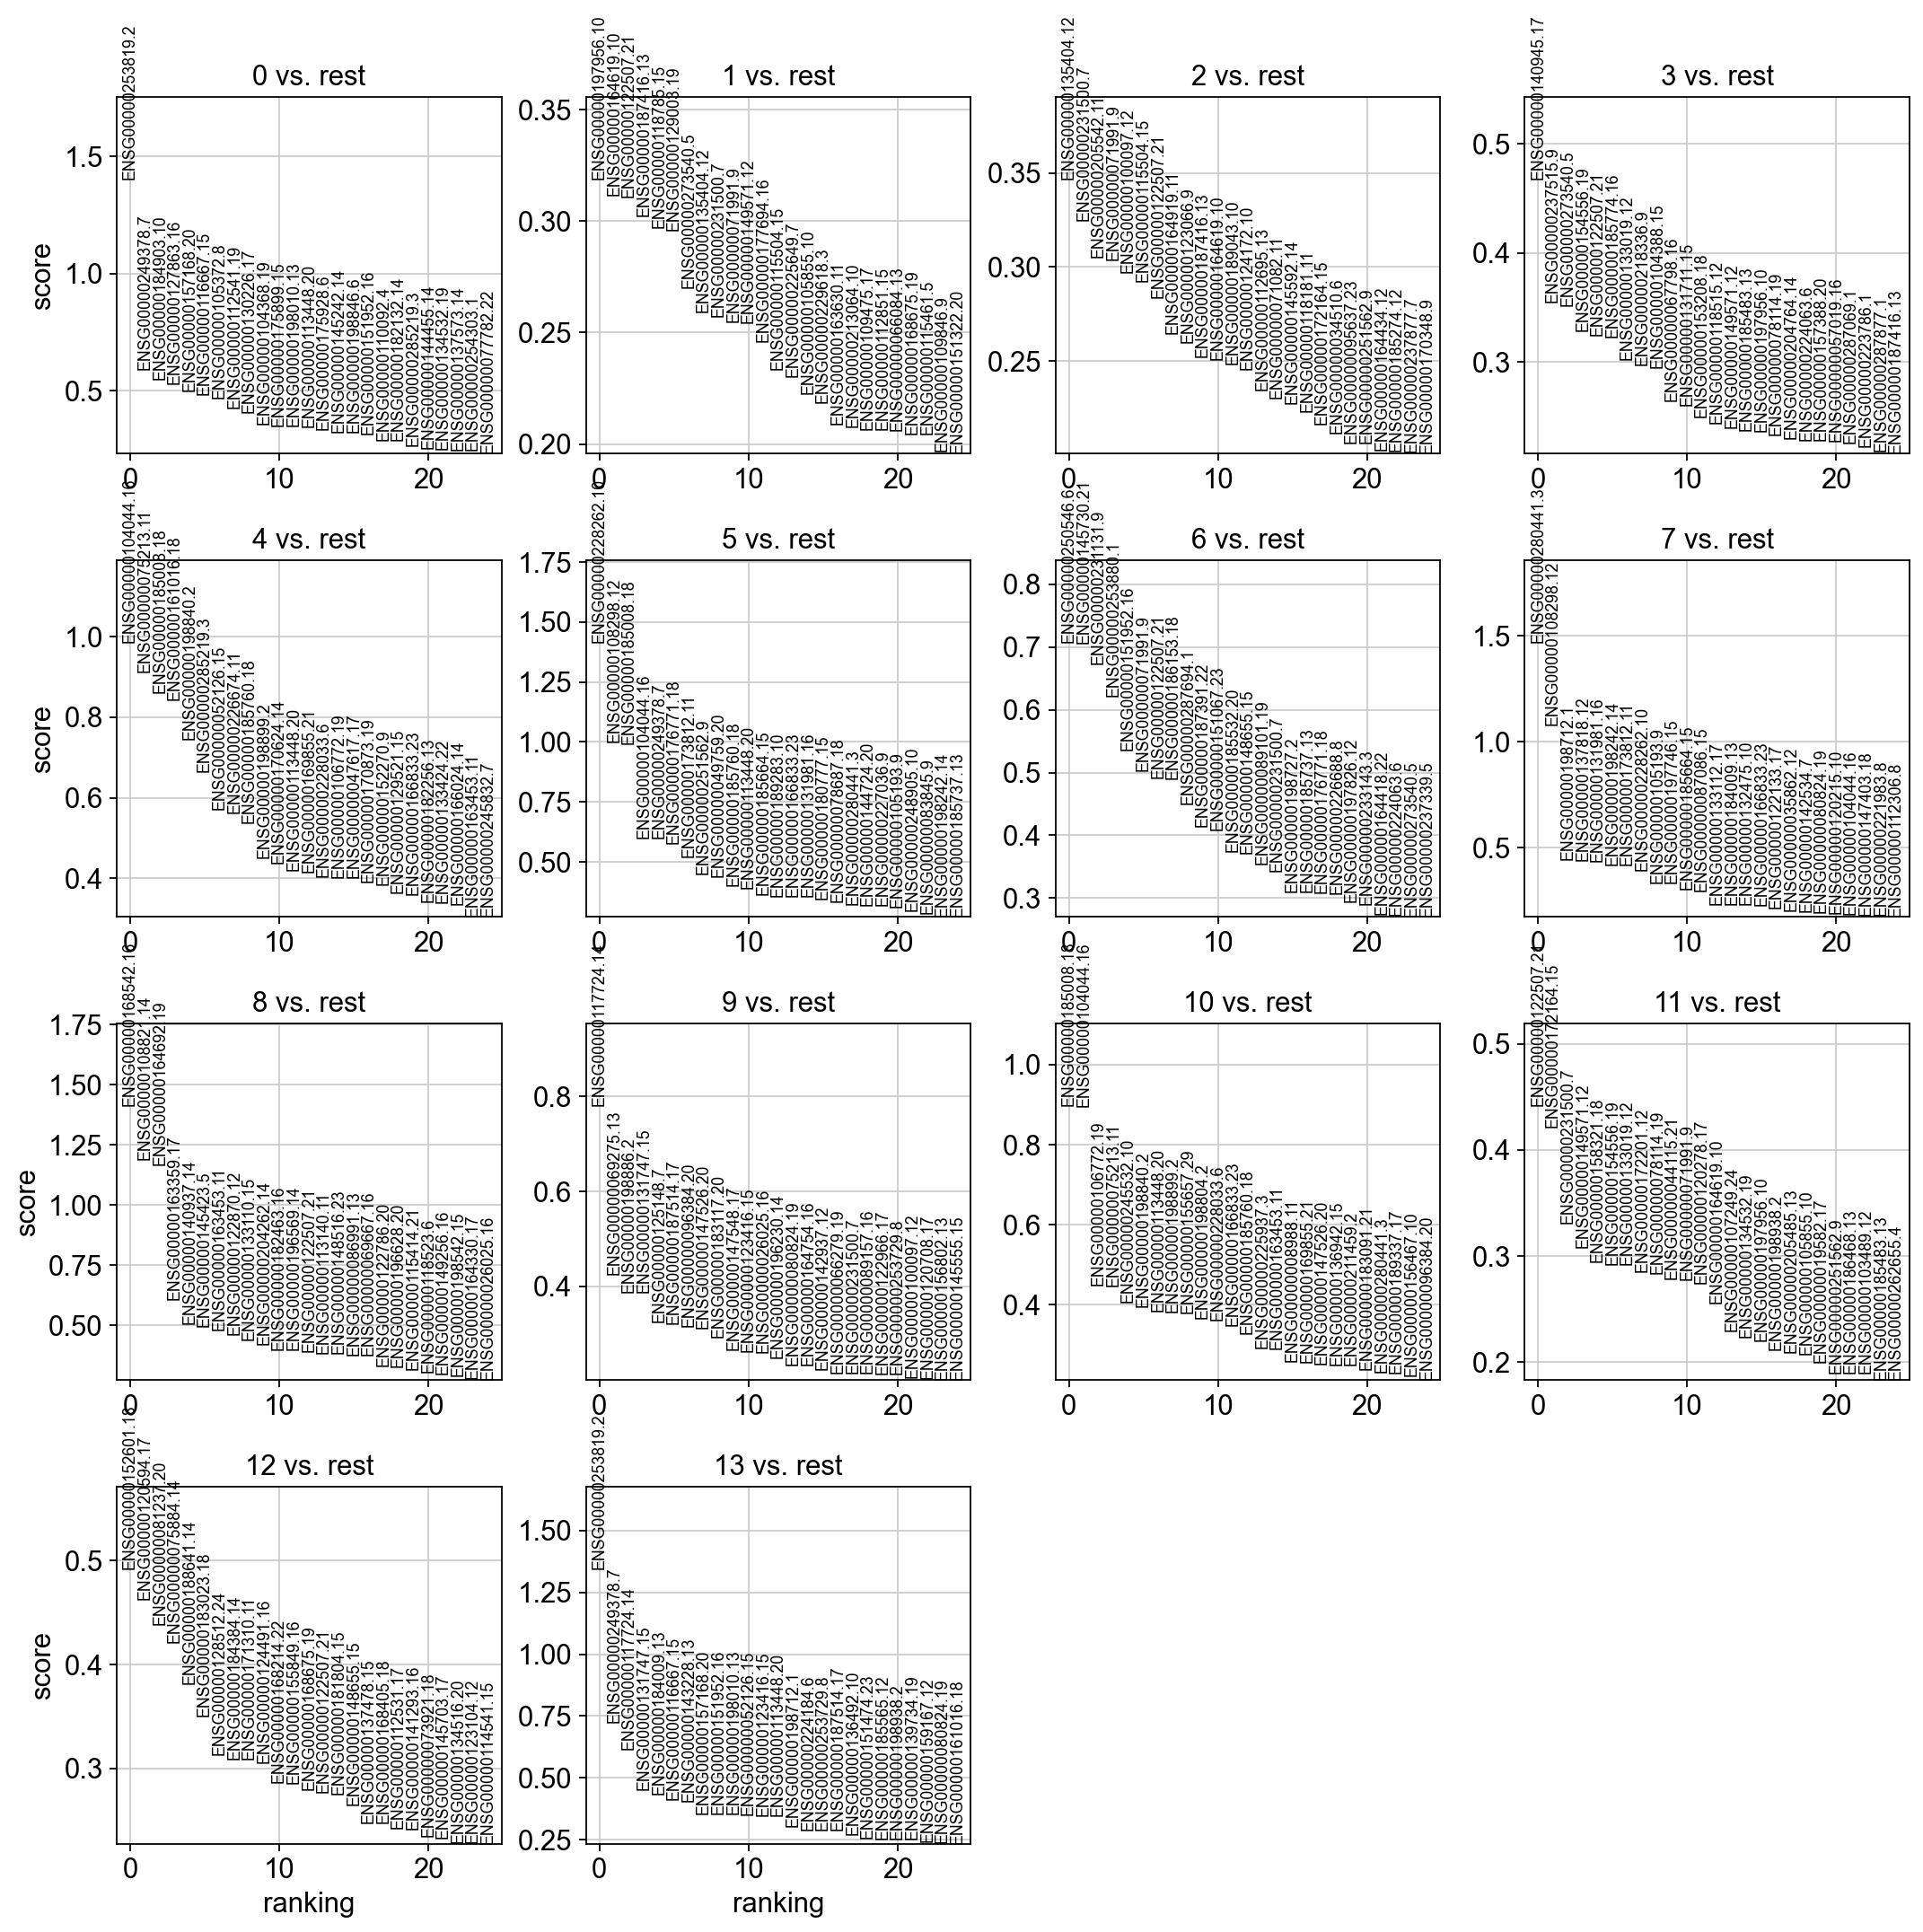

In [14]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save='.pdf')
saveTo(old_fn='rank_genes_groups_louvain', new_fn='rank_gene_louvain_logreg', kind='.pdf')

In [11]:
sc.tl.rank_genes_groups(adata, 'louvain', method='wilcoxon', corr_method="bonferroni")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:03)


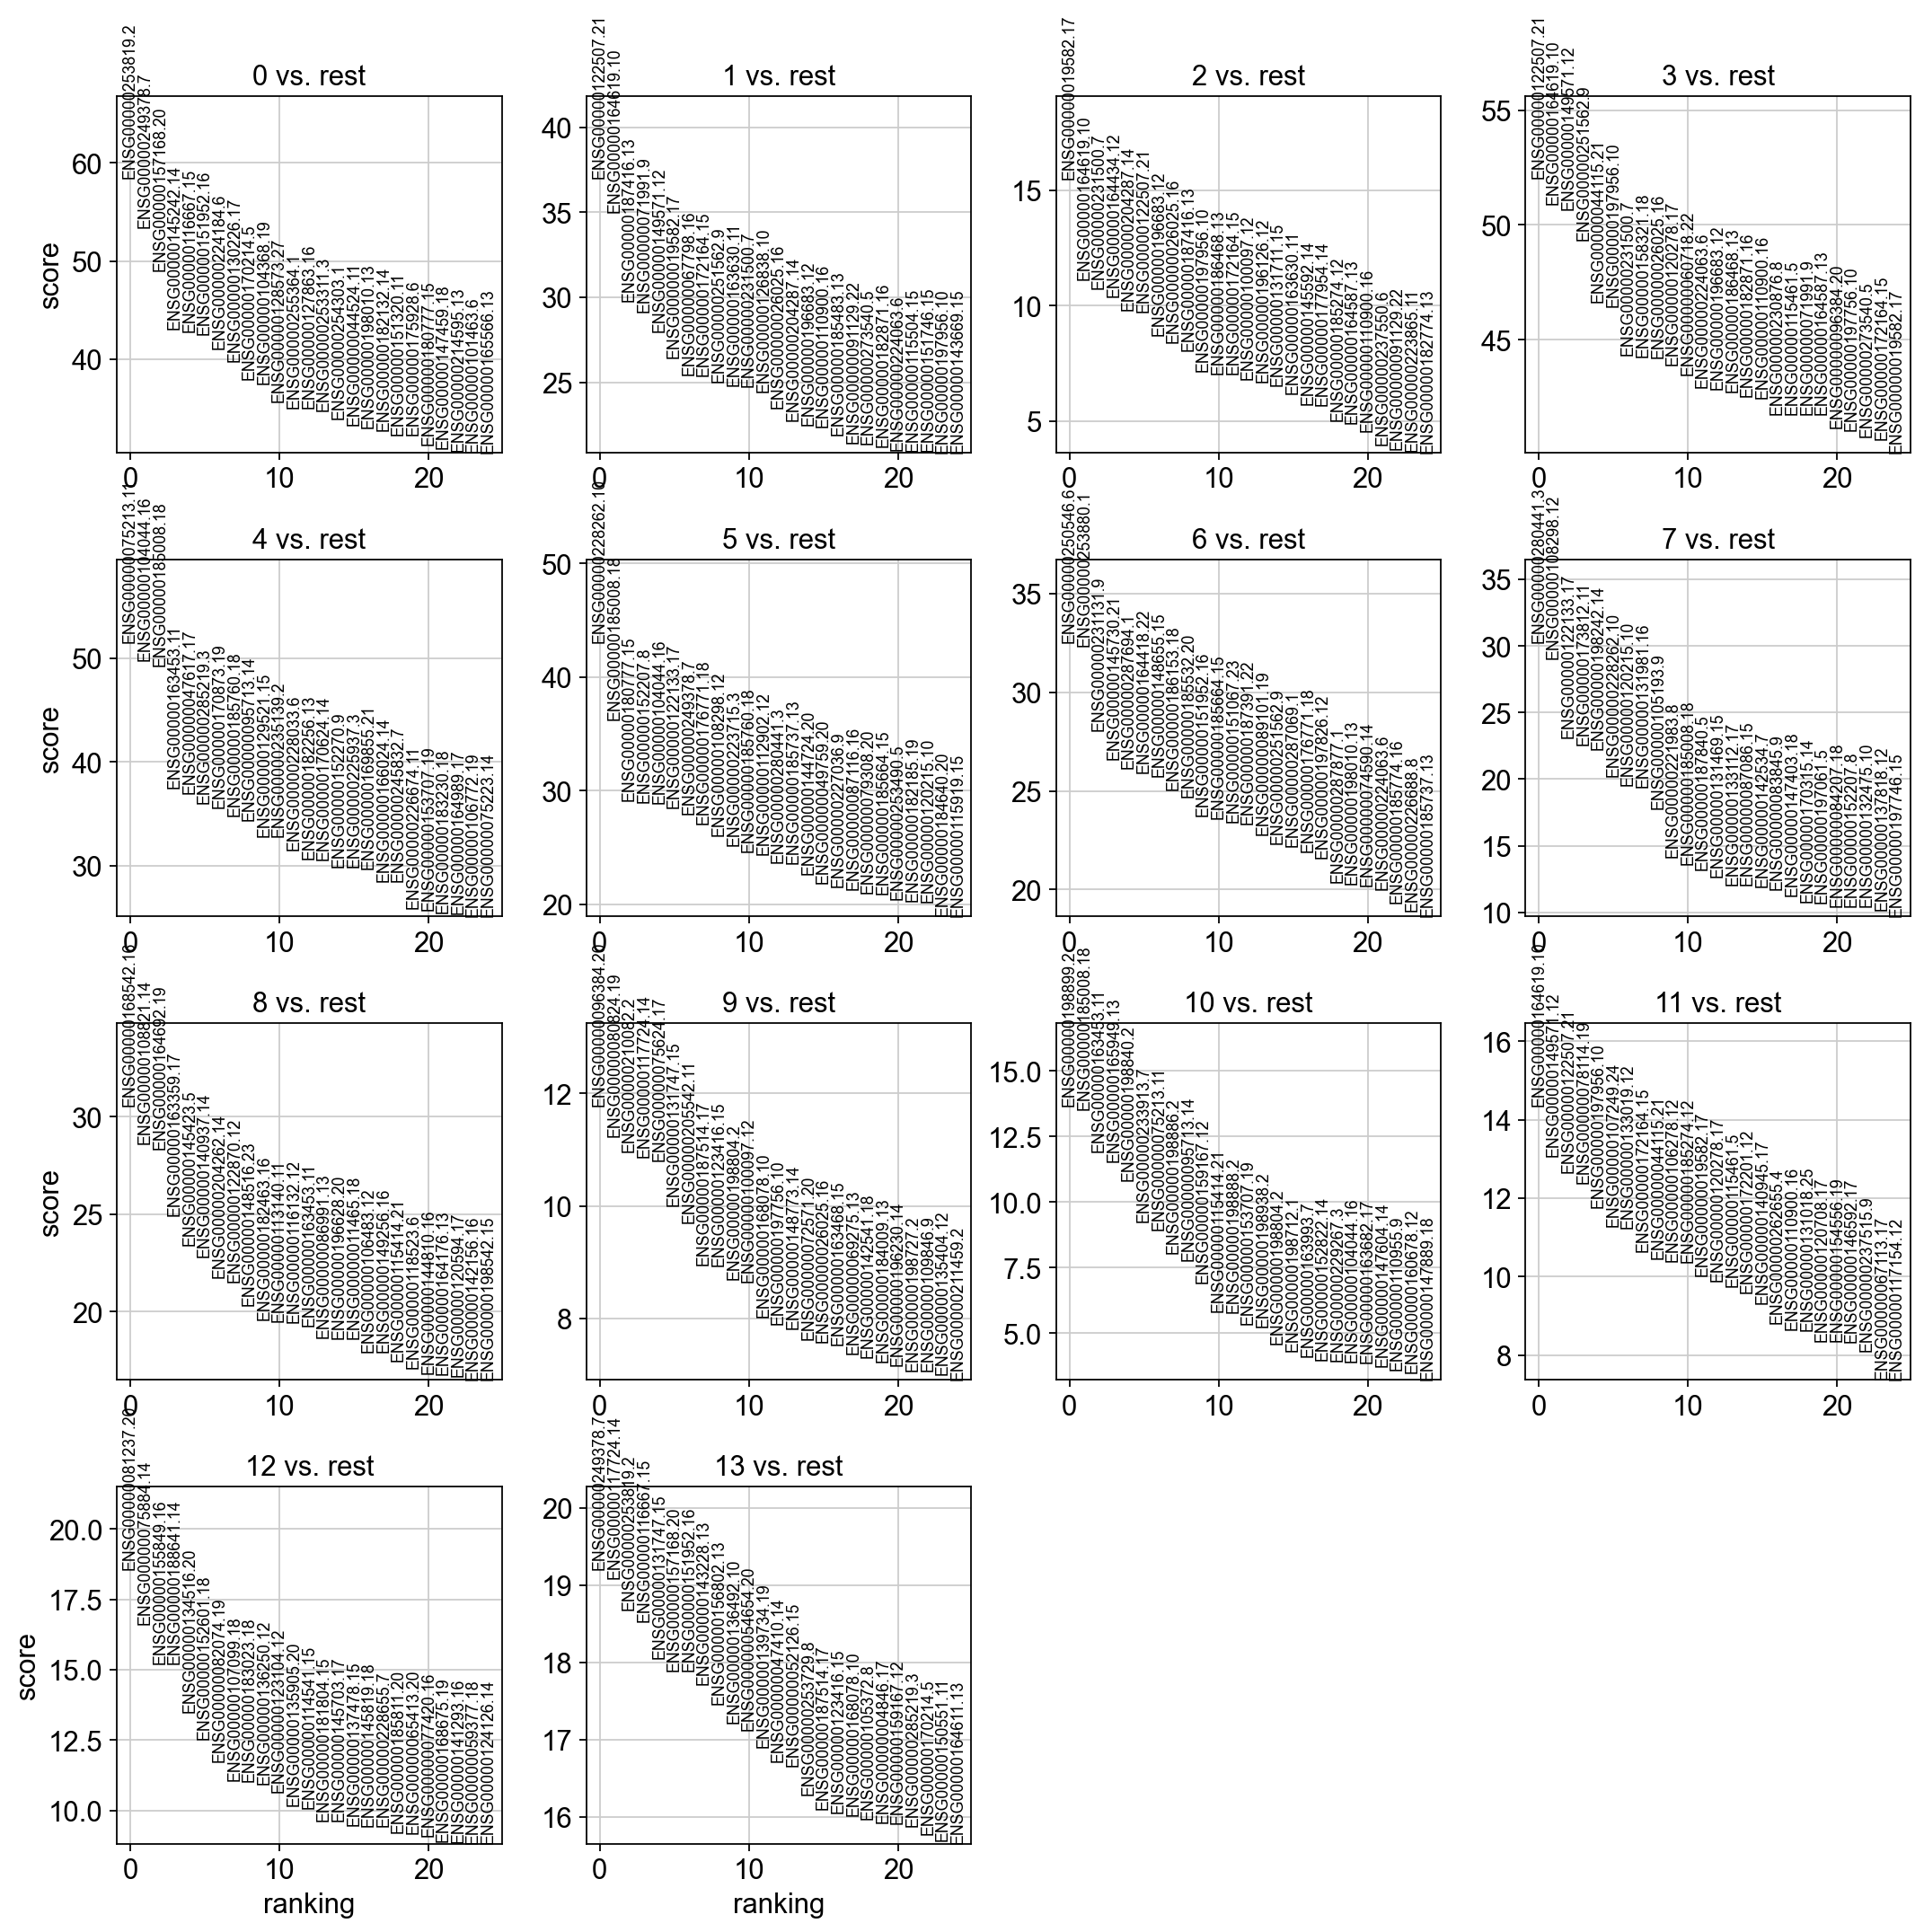

In [12]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, save='.pdf')
saveTo(old_fn='rank_genes_groups_louvain', new_fn='rank_gene_louvain_wilcoxon', kind='.pdf')

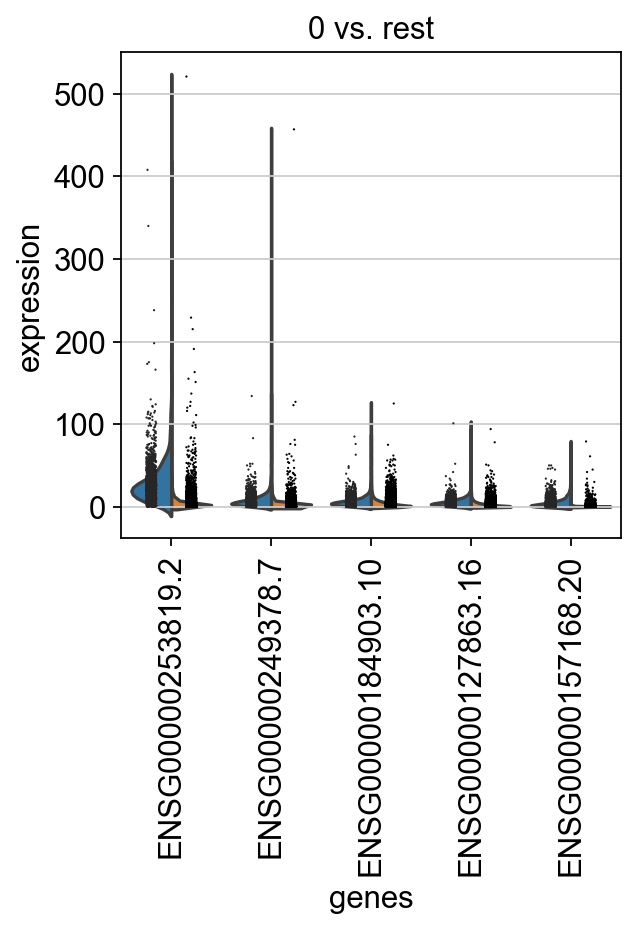

In [17]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=5, save='.pdf')
saveTo(old_fn='rank_genes_groups_louvain_0', new_fn='rank_gene_violin_g0', kind='.pdf')

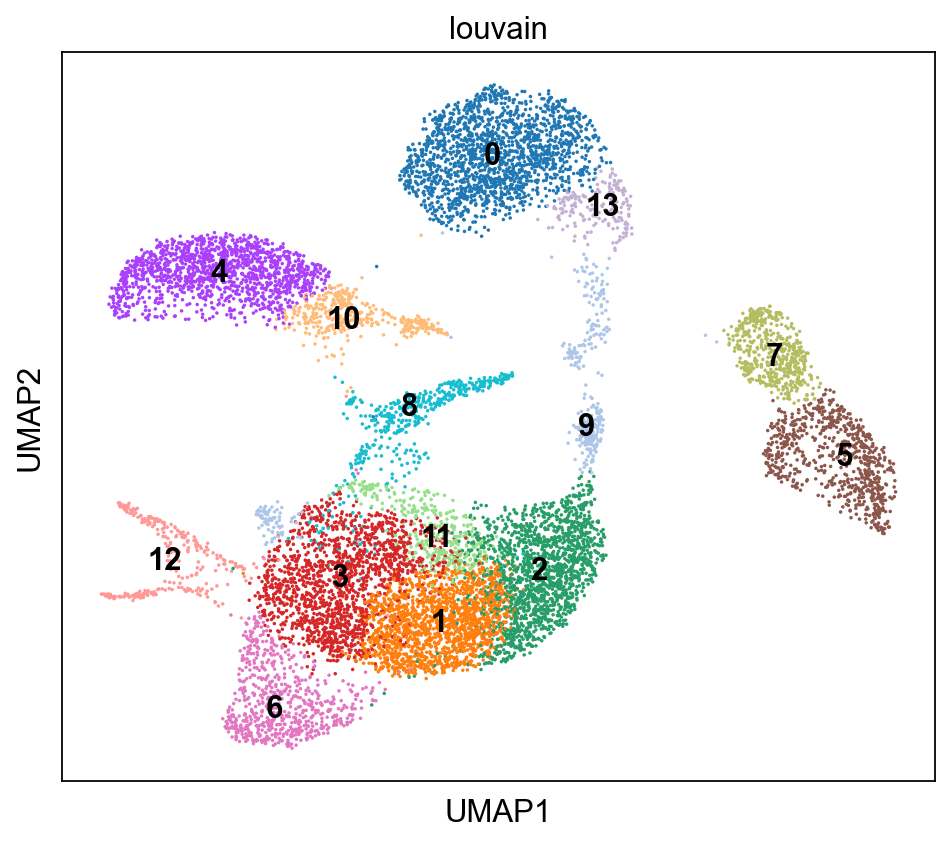

In [18]:
fig, ax = plt.subplots(figsize=(7, 6))
sc.pl.umap(adata, color='louvain', legend_loc='on data', ax=ax)
fig.savefig(args['fig_work_dir'] + 'umap_clusters.pdf', bbox_inches="tight", dpi=300)

In [19]:
del(adata_cp)

In [20]:
adata.write(args['data_work_dir'] + 'adata_annot.h5ad')